<a href="https://colab.research.google.com/github/Vineeshchowdary6826/NLP-Excel-R/blob/master/01_02_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Reviews.csv',nrows=1000)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      1000 non-null   int64 
 1   ProductId               1000 non-null   object
 2   UserId                  1000 non-null   object
 3   ProfileName             1000 non-null   object
 4   HelpfulnessNumerator    1000 non-null   int64 
 5   HelpfulnessDenominator  1000 non-null   int64 
 6   Score                   1000 non-null   int64 
 7   Time                    1000 non-null   int64 
 8   Summary                 1000 non-null   object
 9   Text                    1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [ ]:
df.Summary.head()

,Summary
0,Good Quality Dog Food
1,Not as Advertised
2,"""Delight"" says it all"
3,Cough Medicine
4,Great taffy


In [ ]:
df.Text.head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from textblob import TextBlob
from textblob import Word


In [25]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [29]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import TextBlob, Word
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (Replace with your actual dataset)
# Assuming your original dataset has a 'Score' column
df = pd.DataFrame({'Text': ["This is an example sentence!!!", "Text preprocessing is useful in NLP.", "I amm leaarning machne learning!"],
                   'Score': [5, 4, 3]})  # Added a 'Score' column

# Convert text to lowercase
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Fix: Use regex=True to avoid warning in str.replace
df['Text'] = df['Text'].str.replace('[^\w\s]', '', regex=True)

# Remove stopwords
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Spelling correction
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))

# Lemmatization
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# Display first few rows
print(df.Text.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                 example sentence
1    text preprocessing useful nap
2     am learning machine learning
Name: Text, dtype: object


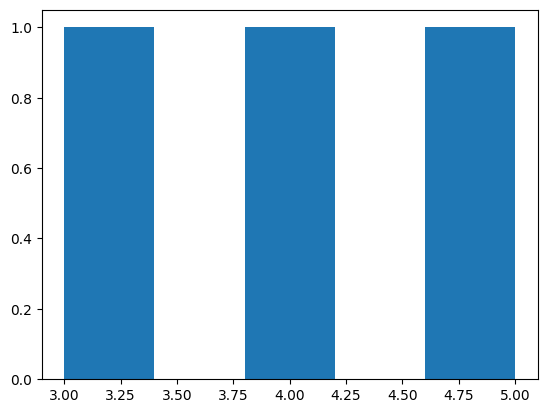

AttributeError: 'DataFrame' object has no attribute 'Id'

In [30]:
reviews = df
reviews.dropna(inplace=True)
reviews.Score.hist(bins=5, grid=False) # Now 'Score' column exists
plt.show()
print(reviews.groupby('Score').count().Id) # Assuming you have an 'Id' column, otherwise adjust accordingly

In [31]:
score_1 = reviews[reviews['Score'] == 1].sample(n=47)
score_2 = reviews[reviews['Score'] == 2].sample(n=47)
score_3 = reviews[reviews['Score'] == 3].sample(n=47)
score_4 = reviews[reviews['Score'] == 4].sample(n=47)
score_5 = reviews[reviews['Score'] == 5].sample(n=47)

ValueError: a must be greater than 0 unless no samples are taken

In [ ]:
reviews_sample = pd.concat([score_1, score_2, score_3, score_4, score_5], axis=0)
reviews_sample.reset_index(drop=True, inplace=True)

# Printing count by 'Score' to check dataset is now balanced.
print(reviews_sample.groupby('Score').count().Id)


NameError: name 'score_1' is not defined